## IMPORTING DATA AND CREATING DATASET

In [5]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from scipy import stats
from numpy import transpose, array
import logging
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
import os 
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

plt.style.use('fivethirtyeight')

## Reading all the dataset

In [6]:
file = os.listdir(r'C:\Users\91880\Desktop\Data Science Practice\Semester 3 - ML in finance\Data')
file = [r'C:\Users\91880\Desktop\Data Science Practice\Semester 3 - ML in finance\Data"\"' + i for i in file]

In [7]:
amd = pd.read_excel('.\Data\AMD.xls', sheet_name= 'AMD')
ads_vintages = pd.read_excel(r'.\Data\ads_vintages-zip.xlsx')
daily_ff_factors = pd.read_csv(r'.\Data\daily-ff-factors.csv')
# F_F_Research_Data_Factors_daily = pd.read_csv(r'.\Data\F-F_Research_Data_Factors_daily.csv')
MACRO_FACTOR = pd.read_excel(r'.\Data\MACRO_FACTOR.xlsx')
MACRO_FACTOR_SELECT = pd.read_excel(r'.\Data\MACRO_FCTR_SELECT.xls')
TB_TERM_STRUCT_3YR = pd.read_excel(r'.\Data\TB_TERM_STRUCT_3YR.xlsx')

## Combining all the Dataset

In [8]:
print('AMD : ', amd.shape) # PCA and then consider
print('ads_vintages : ', ads_vintages.shape) # PCA and then consider
print('daily_ff_factors' , daily_ff_factors.shape) # consider
#print('MACRO_FACTOR' , MACRO_FACTOR.shape) # not to use
print('MACRO_FACTOR_SELECT' , MACRO_FACTOR_SELECT.shape) # not to use
print('TB_TERM_STRUCT_3YR', TB_TERM_STRUCT_3YR.shape) # selct columns and proceed

AMD :  (878, 6)
ads_vintages :  (21855, 71)
daily_ff_factors (878, 5)
MACRO_FACTOR_SELECT (46, 4)
TB_TERM_STRUCT_3YR (974, 13)


## Changing the date to the required format to merge the sheets

#### 1. ads_vintages DATASET

In [9]:
ads_vintages.reset_index(drop = False, inplace= True)
ads_vintages.head(2)

,index,ADS_Index_010319,ADS_Index_010419,ADS_Index_011019,ADS_Index_011719,ADS_Index_011819,ADS_Index_012419,ADS_Index_013119,ADS_Index_020119,ADS_Index_020719,...,ADS_Index_091219,ADS_Index_091719,ADS_Index_091919,ADS_Index_092619,ADS_Index_092719,ADS_Index_100319,ADS_Index_100419,ADS_Index_101019,ADS_Index_101719,ADS_Index_102419
0,1960-03-01,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.816423,-1.824388,-1.824388,...,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069,-2.395069
1,1960-03-02,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.795828,-1.803702,-1.803702,...,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012,-2.369012


In [10]:
ads_vintages.dtypes[:3]

index               datetime64[ns]
ADS_Index_010319           float64
ADS_Index_010419           float64
dtype: object

#### 2. daily_ff_factors Dataset

In [11]:
daily_ff_factors.head(2)

,Date,Mkt-RF,SMB,HML,RF
0,20160104,-1.59,-0.83,0.53,0.0
1,20160105,0.12,-0.22,0.01,0.0


In [12]:
daily_ff_factors['Date'] = daily_ff_factors['Date'].astype(str)

In [13]:
daily_ff_factors['DateTime'] = daily_ff_factors['Date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))

In [14]:
daily_ff_factors.head(2)

,Date,Mkt-RF,SMB,HML,RF,DateTime
0,20160104,-1.59,-0.83,0.53,0.0,2016-01-04
1,20160105,0.12,-0.22,0.01,0.0,2016-01-05


In [15]:
daily_ff_factors.dtypes[3:]

HML                float64
RF                 float64
DateTime    datetime64[ns]
dtype: object

#### 3. MACRO_FACTOR_SELECT Dataset

In [16]:
MACRO_FACTOR_SELECT.head(2)

,Date,CPIAUCSL,INDPRO,IMPCH
0,2016-01-01,237.833,102.9525,37126.434120
1,2016-02-01,237.469,102.2225,36066.892525


In [17]:
MACRO_FACTOR_SELECT.dtypes

Date        datetime64[ns]
CPIAUCSL           float64
INDPRO             float64
IMPCH              float64
dtype: object

#### 4. TB_TERM_STRUCT_3YR DATASET

In [18]:
TB_TERM_STRUCT_3YR.head(2)

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2016-01-04,0.17,NaN,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.64,2.98
1,2016-01-05,0.20,NaN,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,2.67,3.01


In [19]:
TB_TERM_STRUCT_3YR.dtypes[:2]

Date    datetime64[ns]
1 Mo           float64
dtype: object

#### 5. AMD Dataset

In [20]:
amd.head(2)

,Date,Open,Close,High,Low,Volume
0,2016-01-04,2.77,2.77,2.82,2.63,32516800
1,2016-01-05,2.77,2.75,2.80,2.64,12972300


In [21]:
amd.dtypes

Date      datetime64[ns]
Open             float64
Close            float64
High             float64
Low              float64
Volume             int64
dtype: object

## Statistical Features

#### AMD Moments

## Data Cleaning and Preprocessing

#### AMD Dataset

In [22]:
## Changing the data to the required format

amd['Open_Close'] = amd['Open'] - amd['Close'] # open close price
amd['High_Low'] = amd['High'] - amd['Low'] # high low price
amd['Open_tmr'] = amd['Open'].shift(-1) # tomorrow's open price
amd['log_Vol'] = np.log(amd['Volume']) # log Volume for scaling

In [23]:
amd.describe()

,Open,Close,High,Low,Volume,Open_Close,High_Low,Open_tmr,log_Vol
count,878.000000,878.000000,878.000000,878.000000,8.780000e+02,878.000000,878.000000,877.000000,878.000000
mean,13.603918,13.602027,13.919772,13.277973,6.261189e+07,0.001891,0.641800,13.616271,17.718692
std,7.742353,7.730164,7.926530,7.536393,4.303860e+07,0.524535,0.539710,7.738108,0.725028
min,1.810000,1.800000,1.900000,1.750000,5.591100e+06,-2.439998,0.060000,1.810000,15.536687
25%,7.682500,7.670000,7.837500,7.477500,3.450732e+07,-0.180000,0.282500,7.720000,17.356679
50%,12.400000,12.290000,12.655000,12.115000,5.256310e+07,0.010000,0.460000,12.400000,17.777525
75%,18.142500,18.345000,18.852501,17.407500,7.958815e+07,0.209999,0.830000,18.150000,18.192375
max,33.529999,33.230000,34.299999,33.080002,3.250584e+08,3.370001,4.269998,33.529999,19.599515


In [24]:
amd.shape

(878, 10)

In [25]:
amd[60:62]

,Date,Open,Close,High,Low,Volume,Open_Close,High_Low,Open_tmr,log_Vol
60,2016-03-31,2.84,2.85,2.88,2.80,9071500,-0.01,0.08,2.79,16.020648
61,2016-04-01,2.79,2.83,2.88,2.76,8257700,-0.04,0.12,2.83,15.926657


In [26]:
amd = amd.fillna(0)

In [27]:
amd.tail(2)

,Date,Open,Close,High,Low,Volume,Open_Close,High_Low,Open_tmr,log_Vol
876,2019-06-27,30.41,30.740000,30.959999,30.209999,55623300,-0.330000,0.750000,31.08,17.834113
877,2019-06-28,31.08,30.370001,31.110001,30.330000,50090900,0.709999,0.780001,0.00,17.729350


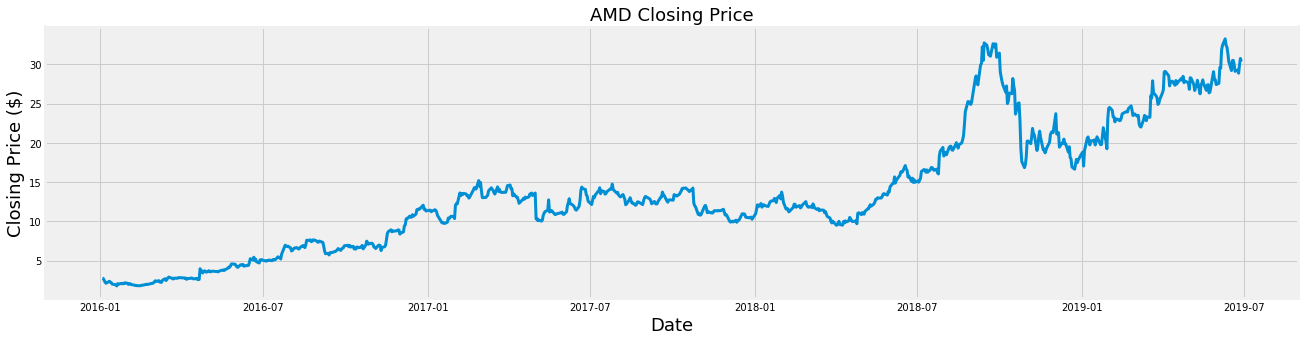

In [28]:
plt.figure(figsize=(20,5))

# Draw the graph

plt.plot(amd['Date'], amd['Close'], linewidth = 3)
plt.xlabel('Date', fontsize=18)
plt.ylabel("Closing Price ($)", fontsize=18)
plt.title("AMD Closing Price", fontsize=18)
plt.show()


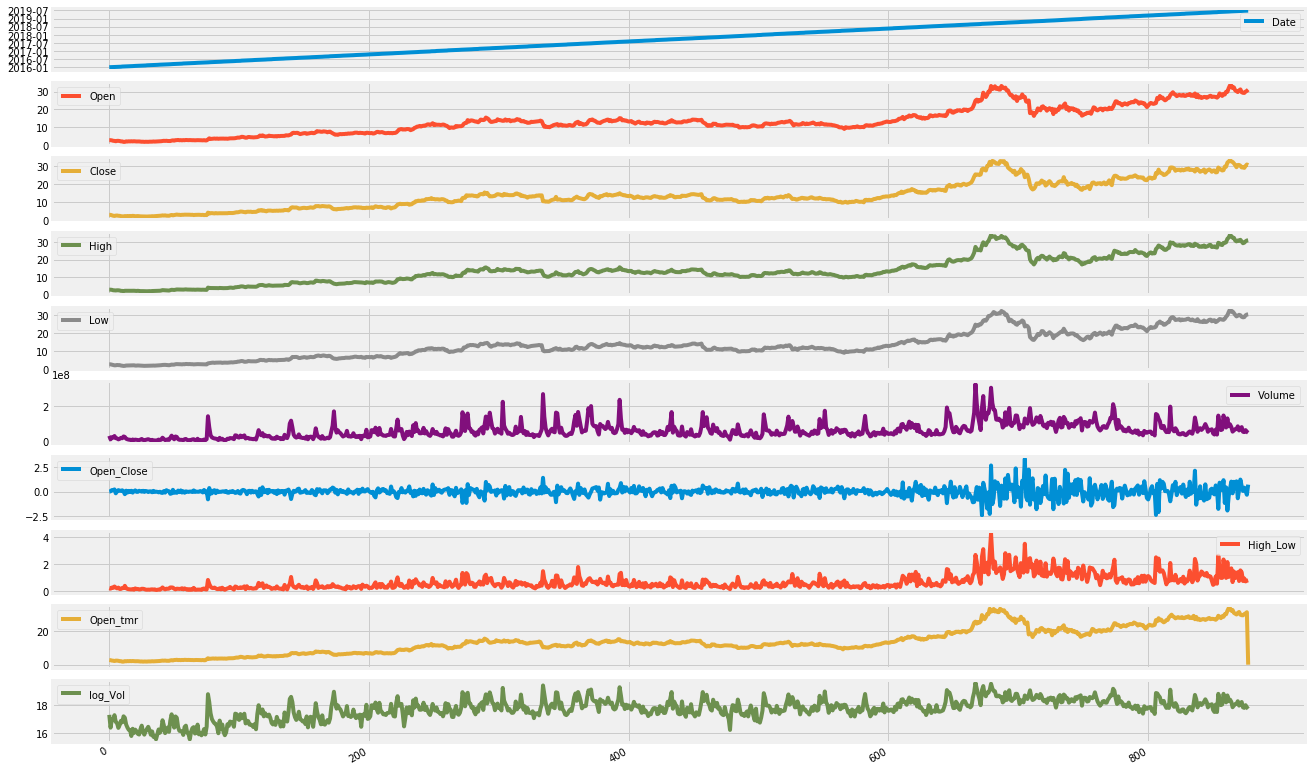

In [29]:
## Visualizing the datasets

amd.plot(subplots=True, figsize=(20,15))
plt.show()

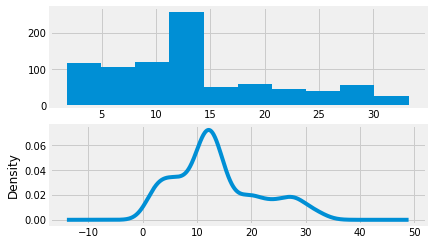

In [30]:
plt.figure(1)
plt.subplot(211)
amd.Close.hist()
plt.subplot(212)
amd.Close.plot(kind='kde')
plt.show()

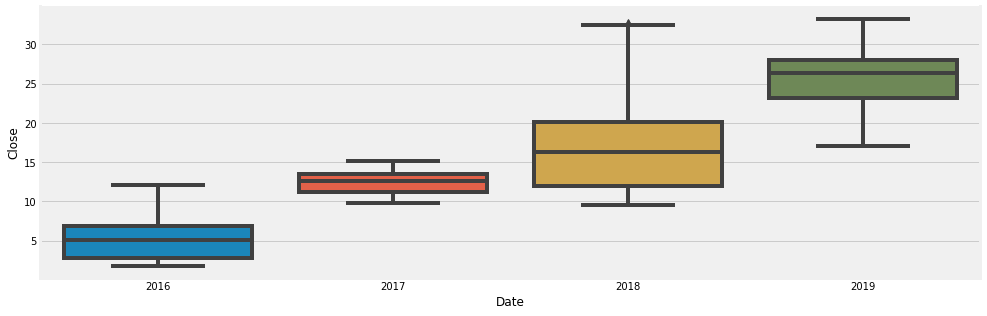

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(amd.Date.dt.year, amd.Close, ax=ax)

In [32]:
# Correlation between the features

corr = amd.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Open,Close,High,Low,Volume,Open_Close,High_Low,Open_tmr,log_Vol
Open,1,0.998,0.999,0.999,0.564,0.0571,0.724,0.987,0.661
Close,0.998,1,0.999,0.999,0.566,-0.0107,0.722,0.99,0.663
High,0.999,0.999,1,0.999,0.579,0.023,0.739,0.989,0.671
Low,0.999,0.999,0.999,1,0.551,0.0212,0.706,0.989,0.653
Volume,0.564,0.566,0.579,0.551,1,-0.0155,0.81,0.567,0.891
Open_Close,0.0571,-0.0107,0.023,0.0212,-0.0155,1,0.0415,-0.0234,-0.0119
High_Low,0.724,0.722,0.739,0.706,0.81,0.0415,1,0.72,0.734
Open_tmr,0.987,0.99,0.989,0.989,0.567,-0.0234,0.72,1,0.663
log_Vol,0.661,0.663,0.671,0.653,0.891,-0.0119,0.734,0.663,1


#### MACRO_FACTOR_SELECT Dataset

In [33]:
MACRO_FACTOR_SELECT.head(2)

,Date,CPIAUCSL,INDPRO,IMPCH
0,2016-01-01,237.833,102.9525,37126.434120
1,2016-02-01,237.469,102.2225,36066.892525


In [34]:
# Correlation between the features

corr = MACRO_FACTOR_SELECT.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,CPIAUCSL,INDPRO,IMPCH
CPIAUCSL,1,0.952,0.267
INDPRO,0.952,1,0.314
IMPCH,0.267,0.314,1


#### daily_ff_factors Dataset

In [35]:
daily_ff_factors.head(2)

,Date,Mkt-RF,SMB,HML,RF,DateTime
0,20160104,-1.59,-0.83,0.53,0.0,2016-01-04
1,20160105,0.12,-0.22,0.01,0.0,2016-01-05


In [36]:
corr = daily_ff_factors.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Mkt-RF,SMB,HML,RF
Mkt-RF,1,0.211,-0.137,-0.0125
SMB,0.211,1,-0.103,-0.0297
HML,-0.137,-0.103,1,-0.0658
RF,-0.0125,-0.0297,-0.0658,1


#### ads_vintages DATASET

In [37]:
amd.tail()

,Date,Open,Close,High,Low,Volume,Open_Close,High_Low,Open_tmr,log_Vol
873,2019-06-24,29.32,29.260000,29.400000,28.670000,55724800,0.060000,0.730000,29.26,17.835936
874,2019-06-25,29.26,28.860001,29.719999,28.799999,53680900,0.399999,0.920000,29.98,17.798568
875,2019-06-26,29.98,29.920000,30.480000,29.780001,65064200,0.060000,0.699999,30.41,17.990885
876,2019-06-27,30.41,30.740000,30.959999,30.209999,55623300,-0.330000,0.750000,31.08,17.834113
877,2019-06-28,31.08,30.370001,31.110001,30.330000,50090900,0.709999,0.780001,0.00,17.729350


In [38]:
ads_vintages.shape
#ads_vintages[20397: 21669]

(21855, 72)

In [44]:
ads_vintages.head(2)
ads_vintages.set_index('index', inplace= True)

In [45]:
X = ads_vintages[20397: 21669].copy()
X = X.fillna(0)

X_scaled = StandardScaler().fit_transform(X)
pca = decomposition.PCA(n_components=6)
X_pca_scaled = pca.fit_transform(X)

In [46]:
pca.explained_variance_ratio_

array([9.33312417e-01, 4.61093832e-02, 1.28718641e-02, 3.42086826e-03,
       1.12347911e-03, 8.51918145e-04])

In [47]:
pca.singular_values_

array([79.6426561 , 17.70218479,  9.3530431 ,  4.82170225,  2.76321523,
        2.40619682])

## MODELS

#### Fama French

In [48]:
ff_factors = pd.read_csv(r'.\Data\daily-ff-factors.csv')
ff_factors.head()

,Date,Mkt-RF,SMB,HML,RF
0,20160104,-1.59,-0.83,0.53,0.0
1,20160105,0.12,-0.22,0.01,0.0
2,20160106,-1.35,-0.12,-0.01,0.0
3,20160107,-2.44,-0.29,0.08,0.0
4,20160108,-1.11,-0.47,-0.03,0.0


In [49]:
ff_factors['Open'] = amd.Open
ff_factors['LogDailyReturns'] = np.log(amd.Close/amd.Close.shift(1))
ff_factors['ones'] = np.ones(len(ff_factors), int)
ff_factors = ff_factors.dropna()
ff_factors.head()

,Date,Mkt-RF,SMB,HML,RF,Open,LogDailyReturns,ones
1,20160105,0.12,-0.22,0.01,0.0,2.77,-0.007246,1
2,20160106,-1.35,-0.12,-0.01,0.0,2.66,-0.091318,1
3,20160107,-2.44,-0.29,0.08,0.0,2.43,-0.096107,1
4,20160108,-1.11,-0.47,-0.03,0.0,2.36,-0.063370,1
5,20160111,-0.06,-0.65,0.34,0.0,2.16,0.089345,1


In [50]:
TX = ff_factors[['ones', 'Mkt-RF', 'SMB', 'HML', 'RF']].values
#X = ff_factors[['ones', 'Mkt-RF', 'SMB', 'HML', 'RF']].values
X = TX[0:700]
X2 = TX[701:877]
X[0:5]

array([[ 1.  ,  0.12, -0.22,  0.01,  0.  ],
       [ 1.  , -1.35, -0.12, -0.01,  0.  ],
       [ 1.  , -2.44, -0.29,  0.08,  0.  ],
       [ 1.  , -1.11, -0.47, -0.03,  0.  ],
       [ 1.  , -0.06, -0.65,  0.34,  0.  ]])

In [51]:
TY = ff_factors[['LogDailyReturns']].values 
#Y = ff_factors[['LogDailyReturns']].values
Y = TY[0:700]
Y2 = TY[701:877]
Y[0:5]

array([[-0.00724641],
       [-0.09131816],
       [-0.09610731],
       [-0.06336961],
       [ 0.0893451 ]])

In [52]:
# Calculating beta
transposeX = np.transpose(TX)
XTX = transposeX@TX
invXTX = np.linalg.inv(XTX)
beta = (invXTX@transposeX)@TY
beta

array([[ 0.00260578],
       [ 0.01896728],
       [ 0.00872839],
       [-0.00777232],
       [-0.21015192]])

In [53]:
# Prediction
Y_hat = TX@beta
Y_hat[0:5]

array([[ 0.00288388],
       [-0.02396973],
       [-0.0468274 ],
       [-0.02231707],
       [-0.0068483 ]])

In [54]:
YP = np.exp(Y_hat)
YP[0:5]

array([[1.00288804],
       [0.97631526],
       [0.95425209],
       [0.97793011],
       [0.9931751 ]])

In [55]:
#print(ff_factors.PredictedReturns.shape)
ff_factors['PredictedReturns'] = YP
ff_factors.head()

,Date,Mkt-RF,SMB,HML,RF,Open,LogDailyReturns,ones,PredictedReturns
1,20160105,0.12,-0.22,0.01,0.0,2.77,-0.007246,1,1.002888
2,20160106,-1.35,-0.12,-0.01,0.0,2.66,-0.091318,1,0.976315
3,20160107,-2.44,-0.29,0.08,0.0,2.43,-0.096107,1,0.954252
4,20160108,-1.11,-0.47,-0.03,0.0,2.36,-0.063370,1,0.977930
5,20160111,-0.06,-0.65,0.34,0.0,2.16,0.089345,1,0.993175


In [56]:
ff_factors['PredictedOpen'] = np.transpose((np.transpose(YP)*ff_factors.Open.values))
ff_factors.head()

,Date,Mkt-RF,SMB,HML,RF,Open,LogDailyReturns,ones,PredictedReturns,PredictedOpen
1,20160105,0.12,-0.22,0.01,0.0,2.77,-0.007246,1,1.002888,2.778000
2,20160106,-1.35,-0.12,-0.01,0.0,2.66,-0.091318,1,0.976315,2.596999
3,20160107,-2.44,-0.29,0.08,0.0,2.43,-0.096107,1,0.954252,2.318833
4,20160108,-1.11,-0.47,-0.03,0.0,2.36,-0.063370,1,0.977930,2.307915
5,20160111,-0.06,-0.65,0.34,0.0,2.16,0.089345,1,0.993175,2.145258


In [57]:
test = ff_factors.iloc[701:877,5:6]
test['PredictedOpen'] = ff_factors.iloc[701:877,-1]
#test['PredictedOpen'] = np.transpose((np.transpose(YP)*test.Open.values))
test.head()

,Open,PredictedOpen
702,26.629999,28.296341
703,28.410000,28.193331
704,27.080000,26.086447
705,27.030001,26.453562
706,24.459999,24.624906


In [58]:
diff = ff_factors.PredictedOpen - ff_factors.Open
buy_signal = diff > (np.mean(diff) + np.std(diff))
sell_signal = diff < (np.mean(diff) + np.std(diff))

In [59]:
errors = ff_factors.Open - ff_factors.PredictedOpen
errors.tail()

873    0.434508
874    0.598235
875    0.079558
876   -0.772992
877   -0.455346
dtype: float64

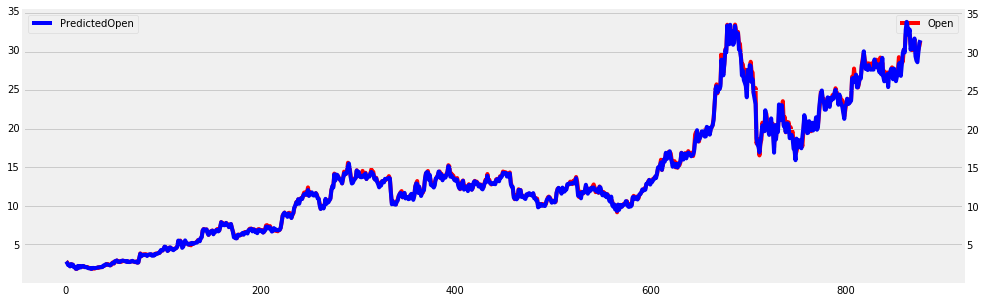

In [60]:
plt.figure(figsize=(15,5))

ax1 = ff_factors.Open.plot(color='red', label='Open')
ax2 = ff_factors.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

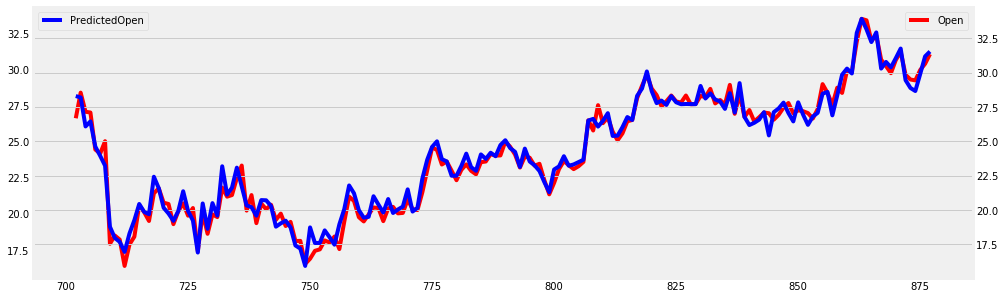

In [61]:
plt.figure(figsize=(15,5))

ax1 = test.Open.plot(color='red', label='Open')
ax2 = test.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

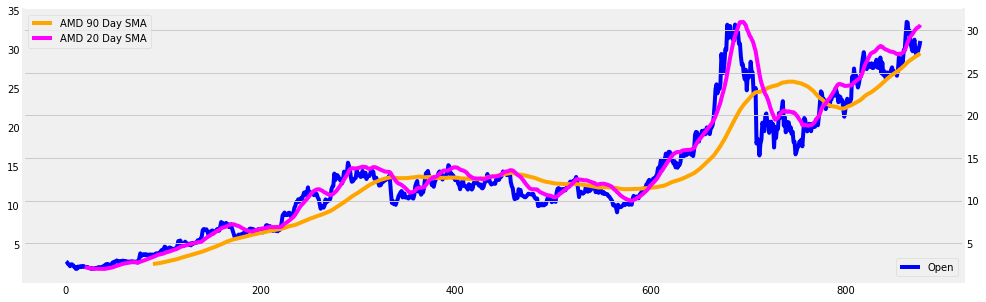

In [62]:
plt.figure(figsize=(15,5))

ax1 = ff_factors.Open.plot(color='blue', label='Open')
#ax2 = ff_factors.PredictedOpen.plot(color='blue', secondary_y=True, label='PredictedOpen')
rolling_mean = ff_factors.Open.rolling(window=90).mean()
ax2 = rolling_mean.plot(color='orange', secondary_y=True, label='AMD 90 Day SMA')
rolling_mean2 = ff_factors.Open.rolling(window=20).mean()
ax3 = rolling_mean2.plot(color='magenta', secondary_y=True, label='AMD 20 Day SMA')

ax1.legend(loc=4)
ax2.legend(loc=2)
#ax3.legend(loc=3)

plt.show()

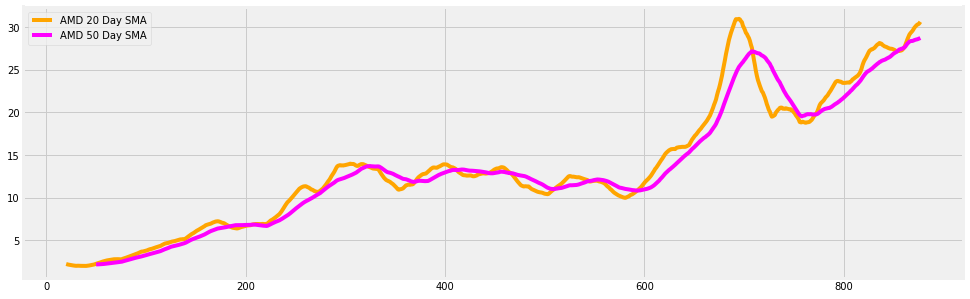

In [63]:
plt.figure(figsize=(15,5))
rolling_mean = ff_factors.Open.rolling(window=20).mean()
rolling_mean2 = ff_factors.Open.rolling(window=50).mean()
#plt.plot(df.ds, df.y, label='AMD')
plt.plot( rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot( rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

#### Linear regression

In [91]:
X_train = amd[['Open','Open_Close','High_Low','log_Vol']][:700].values # Window_size = 60
y_train = amd['Open_tmr'][:700].values
X_test = amd[['Open','Open_Close','High_Low','log_Vol']][700:].values
y_test = amd['Open_tmr'][700:].values

In [92]:
from sklearn import datasets, linear_model, metrics 
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred_linear = model.predict(X_test)

In [93]:
print(model.intercept_)
print(model.coef_)

-0.18393963104710842
[ 0.99681489 -1.12798389  0.07636851  0.01203229]


In [94]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.726e+05
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:07:37   Log-Likelihood:                 7.7200
No. Observations:                 700   AIC:                            -7.440
Df Residuals:                     696   BIC:                             10.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9973      0.002    423.119      0.000       0.993       1.002
x2            -1.1287      0.023    -48.481      0.000      -1.174      -1.083
x3             0.0844      0.031      2.688      0.007       0.023       0.146
x4             0.0010      0.001      0.911      0.363      -0.001       0.003
==============================================================================
Omnibus:                      191.480   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4973.705
Skew:                          -0.600   Prob(JB):                         0.00
Kurtosis:                      16.003   Cond. No.                         73.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

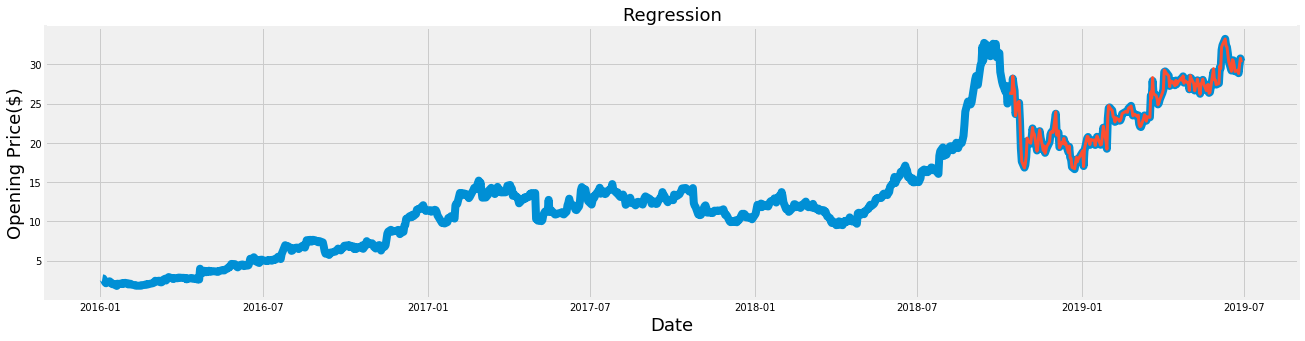

In [69]:
plt.figure(figsize=(20,5))

# Draw the graph

plt.plot(amd['Date'], amd['Close'], linewidth = 8)
plt.plot(amd['Date'][700:], prediction, linewidth = 3)
plt.xlabel('Date', fontsize=18)
plt.ylabel("Opening Price($)", fontsize=18)
plt.title("Regression", fontsize=18)
plt.show()


#### EMA

In [70]:
Window_size = 60
start_date = 61
total_days = amd.shape[0]
bootstrap_count = 50
y_pred_all = []

In [71]:

def EMA_train(X, Y):
    estimators = []
    # OLS Method implementation yt=beta2*EMA(20)+uhatt        
    invXTX = np.linalg.inv(X.transpose()@X)
    beta_hat = invXTX@X.transpose()@Y
    
    y_hat = X@beta_hat

    
    T= Y.shape[0]        
    N = X.shape[1] 
    
    
    # residuals
    res = Y-y_hat
        
    # variance of error term / residuals
    var = (1/T)*res.transpose()@res  
    std = np.sqrt(var)
    #print(std)
    # variance-covariance matrix of beta_hat
    var_cov_beta = var*invXTX   
    std_cov_beta = np.sqrt(T*np.diag(var_cov_beta))
    
    # t-test statistics
    import scipy.stats as ss
    t_stat = (beta_hat.transpose()-0)/std_cov_beta
    p_val_t = 1-ss.norm.cdf(t_stat)
    #print("t_stat:", t_stat)
    #print("p_val_t:", p_val_t)
           
    # using MSE
    MSE = (sum((Y-y_hat)**2))/(len(X)-len(X[0]))
    var_b = MSE*(np.linalg.inv(np.dot(X.T,X)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = beta_hat/ sd_b
    from scipy import stats
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X)-1))) for i in ts_b]
    #print("t_stat:", ts_b)
    #print("p_val_t:", p_values)
    
    #  F-test stats
    f_stat = (beta_hat.transpose()@inv(var_cov_beta)@beta_hat/N)/(res.transpose()@res/(T-N))
    p_val_f = 1-ss.f.cdf(f_stat, N-1, len(X)-N)
    
    #print("f_test: ", f_stat)
    #print("f_test p_val: ", p_val_f)
        
    # R-square
    R2 = 1-T*var/(T*np.var(Y))
    # R2 = 1 - (residuals.transpose()@residuals)/(Y.transpose()@Y)
    # ADJ R2
    R2_adj = 1-(1-R2)*(T-1)/(T-N)
    #print("EWMA model R2: ", R2, R2_adj)
    estimators.append(f_stat)
    estimators.append(R2)
    estimators.append(R2_adj)
    estimators.append(p_val_f)
    return beta_hat, y_hat,estimators;

In [72]:
def ema_bstr():
    yhat_ema = []
    y_test = amd.Open_tmr[0:816]
    # 5 days EMA
    ema_short = amd['Open_tmr'].ewm(span=5, adjust=False).mean()
    
    for i in range(start_date+1, total_days):
        X_train = ema_short[i-Window_size:i-1]
        X_train = np.column_stack([np.ones((len(X_train),1)),X_train])        
        X_pred = ema_short[i-1:i]  
        X_pred = np.column_stack([np.ones((len(X_pred),1)),X_pred])        
        Y_train = amd['Open_tmr'][i-Window_size:i-1].values
        beta_hat, yhat_fit,est = EMA_train(X_train,Y_train)
        res_fit = Y_train - yhat_fit
        print('beta : ' , beta_hat)
        print('R squared' , est[1])
        print('adjusted R squared' , est[3])      
        # bootstrap method: switching residuals
        y_pred_all = np.zeros(bootstrap_count)
        for boot in range(0, bootstrap_count):
            err = np.random.choice(res_fit, (Window_size-1,), replace=True)
            y_bstr = yhat_fit + err           
            beta_bstr = EMA_train(X_train, y_bstr)[0]            
            y_pred_bstr = X_pred@beta_bstr
            y_pred_all[boot]=y_pred_bstr            
        y_pred = y_pred_all.mean() # mean of all bootstrap predictions 
        yhat_ema.append(y_pred)        
    #print(type(ema_short),ema_short)
    #rmse_ema=np.sqrt(np.mean((Y-yhat_ema)**2)) 
    plt.figure(figsize=(20,5))
    plt.plot(amd['Date'][0:816], y_test,linewidth=4, label = 'y_test')
    plt.plot(amd['Date'][0:816],yhat_ema, linewidth=2, label = 'y_pred')
    plt.plot(amd['Date'][0:816],ema_short[0:816], linewidth=2, label = 'EMA 5 days')
    plt.ylabel('PRICE')
    plt.legend()
    plt.show()
    return yhat_ema


beta :  [-0.09668101  1.04389999]
R squared 0.9035641256484575
adjusted R squared 1.1102230246251565e-16
beta :  [-0.12685792  1.05884608]
R squared 0.916044247421666
adjusted R squared 1.1102230246251565e-16
beta :  [-0.13228274  1.06222854]
R squared 0.9246188053137493
adjusted R squared 1.1102230246251565e-16
beta :  [-0.13019302  1.06281369]
R squared 0.937249917517171
adjusted R squared 1.1102230246251565e-16
beta :  [-0.12116983  1.05865158]
R squared 0.9388351837896316
adjusted R squared 1.1102230246251565e-16
beta :  [-0.10783775  1.05234443]
R squared 0.939199162950766
adjusted R squared 1.1102230246251565e-16
beta :  [-0.10456401  1.05139426]
R squared 0.9420546905352081
adjusted R squared 1.1102230246251565e-16
beta :  [-0.09821964  1.04994792]
R squared 0.9483911551111429
adjusted R squared 1.1102230246251565e-16
beta :  [-0.0868036   1.04583826]
R squared 0.952066518447782
adjusted R squared 1.1102230246251565e-16
beta :  [-0.05426205  1.03352795]
R squared 0.9616313291084

beta :  [-0.08767647  1.03542518]
R squared 0.9601651416582262
adjusted R squared 1.1102230246251565e-16
beta :  [-0.24914198  1.07355034]
R squared 0.9533989202085854
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37783913  1.10292125]
R squared 0.9557620564110075
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37929862  1.10345848]
R squared 0.9595450442976049
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37787197  1.10286435]
R squared 0.9629788758401435
adjusted R squared 1.1102230246251565e-16
beta :  [-0.35251853  1.09690459]
R squared 0.9653370379182308
adjusted R squared 1.1102230246251565e-16
beta :  [-0.26949759  1.0780129 ]
R squared 0.9635350801463114
adjusted R squared 1.1102230246251565e-16
beta :  [-0.16334651  1.05400968]
R squared 0.9574031986035757
adjusted R squared 1.1102230246251565e-16
beta :  [-0.1085113   1.04202912]
R squared 0.956476030932832
adjusted R squared 1.1102230246251565e-16
beta :  [-0.0859985   1.03721558]
R squared 0.9569691091

beta :  [-0.3399093   1.04763073]
R squared 0.818866883976969
adjusted R squared 1.1102230246251565e-16
beta :  [-0.23434169  1.03154103]
R squared 0.8153287099273244
adjusted R squared 1.1102230246251565e-16
beta :  [-0.14908806  1.01904703]
R squared 0.8048178910931703
adjusted R squared 1.1102230246251565e-16
beta :  [-0.30301396  1.04311714]
R squared 0.7839768774635735
adjusted R squared 1.1102230246251565e-16
beta :  [-0.90337867  1.13368218]
R squared 0.7724962652870868
adjusted R squared 1.1102230246251565e-16
beta :  [-1.37170738  1.20373887]
R squared 0.7963859155155624
adjusted R squared 1.1102230246251565e-16
beta :  [-1.68520179  1.25071029]
R squared 0.8318494253287051
adjusted R squared 1.1102230246251565e-16
beta :  [-1.58183843  1.235642  ]
R squared 0.8513223871296886
adjusted R squared 1.1102230246251565e-16
beta :  [-1.49885948  1.22397798]
R squared 0.8729062738081236
adjusted R squared 1.1102230246251565e-16
beta :  [-1.31096069  1.19613964]
R squared 0.8812643307

beta :  [-0.20032124  1.02659363]
R squared 0.9158395809125908
adjusted R squared 1.1102230246251565e-16
beta :  [-0.22910984  1.02864353]
R squared 0.9167262372544462
adjusted R squared 1.1102230246251565e-16
beta :  [-0.26703605  1.03128357]
R squared 0.9181744118122034
adjusted R squared 1.1102230246251565e-16
beta :  [-0.24174267  1.02873981]
R squared 0.9177876156508906
adjusted R squared 1.1102230246251565e-16
beta :  [-0.24154955  1.02787909]
R squared 0.9178204960896184
adjusted R squared 1.1102230246251565e-16
beta :  [-0.27537638  1.02971238]
R squared 0.9196115652362716
adjusted R squared 1.1102230246251565e-16
beta :  [-0.3558916   1.03620412]
R squared 0.9216029215666122
adjusted R squared 1.1102230246251565e-16
beta :  [-0.30796012  1.03194328]
R squared 0.9209979371342969
adjusted R squared 1.1102230246251565e-16
beta :  [-0.31927583  1.03248665]
R squared 0.9219602961355507
adjusted R squared 1.1102230246251565e-16
beta :  [-0.37202767  1.03605343]
R squared 0.925180478

beta :  [-0.57370356  1.04564798]
R squared 0.8007248422766993
adjusted R squared 1.1102230246251565e-16
beta :  [-0.71164801  1.05796067]
R squared 0.8034740621161398
adjusted R squared 1.1102230246251565e-16
beta :  [-0.89431846  1.07435547]
R squared 0.8112540606712428
adjusted R squared 1.1102230246251565e-16
beta :  [-1.02299853  1.08593223]
R squared 0.8181804248113228
adjusted R squared 1.1102230246251565e-16
beta :  [-1.16154566  1.09820441]
R squared 0.8255125309240304
adjusted R squared 1.1102230246251565e-16
beta :  [-1.23198794  1.10422337]
R squared 0.8323676814347987
adjusted R squared 1.1102230246251565e-16
beta :  [-1.10254088  1.09298372]
R squared 0.8318812641391522
adjusted R squared 1.1102230246251565e-16
beta :  [-1.10561755  1.09324721]
R squared 0.8365430860993932
adjusted R squared 1.1102230246251565e-16
beta :  [-0.96372233  1.08077636]
R squared 0.8339789025083616
adjusted R squared 1.1102230246251565e-16
beta :  [-0.92102187  1.07701537]
R squared 0.835370248

beta :  [-2.401212    1.18077565]
R squared 0.7612004212134182
adjusted R squared 1.1102230246251565e-16
beta :  [-2.57764018  1.19493296]
R squared 0.7872820987772432
adjusted R squared 1.1102230246251565e-16
beta :  [-2.74808754  1.20837926]
R squared 0.8122238634071774
adjusted R squared 1.1102230246251565e-16
beta :  [-2.57620456  1.19597566]
R squared 0.8342818949849262
adjusted R squared 1.1102230246251565e-16
beta :  [-1.97311339  1.15024462]
R squared 0.8203401094630427
adjusted R squared 1.1102230246251565e-16
beta :  [-1.68450851  1.128099  ]
R squared 0.8193400552776304
adjusted R squared 1.1102230246251565e-16
beta :  [-1.4881215   1.11290818]
R squared 0.8206770675425898
adjusted R squared 1.1102230246251565e-16
beta :  [-1.56074531  1.11871853]
R squared 0.8306073675795634
adjusted R squared 1.1102230246251565e-16
beta :  [-1.57137327  1.11971295]
R squared 0.8392702631224023
adjusted R squared 1.1102230246251565e-16
beta :  [-1.55033965  1.11821489]
R squared 0.846985827

beta :  [-0.39256383  1.03777988]
R squared 0.8886322479731483
adjusted R squared 1.1102230246251565e-16
beta :  [-0.15673308  1.01781883]
R squared 0.88829037778035
adjusted R squared 1.1102230246251565e-16
beta :  [0.03019373 1.00201079]
R squared 0.8847346242985462
adjusted R squared 1.1102230246251565e-16
beta :  [0.12732525 0.9940233 ]
R squared 0.8802115803903982
adjusted R squared 1.1102230246251565e-16
beta :  [0.1969967  0.98781415]
R squared 0.8723957109503411
adjusted R squared 1.1102230246251565e-16
beta :  [0.29100927 0.9806152 ]
R squared 0.8636890942451269
adjusted R squared 1.1102230246251565e-16
beta :  [0.34869099 0.97577501]
R squared 0.8550877746931216
adjusted R squared 1.1102230246251565e-16
beta :  [0.48481441 0.96419123]
R squared 0.842067640547676
adjusted R squared 1.1102230246251565e-16
beta :  [0.54922466 0.95838907]
R squared 0.8259230477005706
adjusted R squared 1.1102230246251565e-16
beta :  [0.61627649 0.95269638]
R squared 0.8097100200299274
adjusted R 

beta :  [-0.1131611   1.02484686]
R squared 0.9840071618257152
adjusted R squared 1.1102230246251565e-16
beta :  [0.03557966 1.01349831]
R squared 0.9852842120542407
adjusted R squared 1.1102230246251565e-16
beta :  [0.11415355 1.00606849]
R squared 0.9828973773154891
adjusted R squared 1.1102230246251565e-16
beta :  [0.16155457 1.00225714]
R squared 0.9826570117928791
adjusted R squared 1.1102230246251565e-16
beta :  [0.2501257  0.99484199]
R squared 0.9812013534455553
adjusted R squared 1.1102230246251565e-16
beta :  [0.30189731 0.99090269]
R squared 0.980881997824055
adjusted R squared 1.1102230246251565e-16
beta :  [0.34527143 0.98747992]
R squared 0.9803442257207964
adjusted R squared 1.1102230246251565e-16
beta :  [0.3581423  0.98672535]
R squared 0.9799917928318472
adjusted R squared 1.1102230246251565e-16
beta :  [0.27510477 0.99405132]
R squared 0.9779086391960918
adjusted R squared 1.1102230246251565e-16
beta :  [0.26920959 0.99521252]
R squared 0.9774376179320877
adjusted R 

beta :  [0.86532852 0.97547344]
R squared 0.9510263049391061
adjusted R squared 1.1102230246251565e-16
beta :  [0.9410013  0.97251083]
R squared 0.9488345406051782
adjusted R squared 1.1102230246251565e-16
beta :  [0.63976143 0.98113708]
R squared 0.9277847936837536
adjusted R squared 1.1102230246251565e-16
beta :  [0.26776012 0.99339335]
R squared 0.9205978745283427
adjusted R squared 1.1102230246251565e-16
beta :  [-0.06070301  1.00454803]
R squared 0.9173944178986604
adjusted R squared 1.1102230246251565e-16
beta :  [-0.60253985  1.02337734]
R squared 0.9158111784854494
adjusted R squared 1.1102230246251565e-16
beta :  [-0.78948119  1.02988591]
R squared 0.9171822915836374
adjusted R squared 1.1102230246251565e-16
beta :  [-0.85808857  1.03225298]
R squared 0.9183389633089504
adjusted R squared 1.1102230246251565e-16
beta :  [-0.62123085  1.02405879]
R squared 0.915505388496296
adjusted R squared 1.1102230246251565e-16
beta :  [-0.52678741  1.02081011]
R squared 0.9143798093613065
a

beta :  [-1.8278233   1.09572661]
R squared 0.8747989255171373
adjusted R squared 1.1102230246251565e-16
beta :  [-1.66736664  1.08834798]
R squared 0.879901257535262
adjusted R squared 1.1102230246251565e-16
beta :  [-1.65238525  1.08708317]
R squared 0.8850966947738593
adjusted R squared 1.1102230246251565e-16
beta :  [-1.77946315  1.09335298]
R squared 0.8915826130280067
adjusted R squared 1.1102230246251565e-16
beta :  [-1.79737823  1.09291515]
R squared 0.9031788219827488
adjusted R squared 1.1102230246251565e-16
beta :  [-1.62879803  1.08395587]
R squared 0.905858422615348
adjusted R squared 1.1102230246251565e-16
beta :  [-1.36499113  1.0701945 ]
R squared 0.9039624791146283
adjusted R squared 1.1102230246251565e-16
beta :  [-1.27973049  1.06512686]
R squared 0.9088196865680723
adjusted R squared 1.1102230246251565e-16
beta :  [-1.12978319  1.05680869]
R squared 0.9137947049180376
adjusted R squared 1.1102230246251565e-16
beta :  [-1.02662309  1.05246749]
R squared 0.91925228932

beta :  [-1.92755576  1.07462058]
R squared 0.8554400256846817
adjusted R squared 1.1102230246251565e-16
beta :  [-1.92441884  1.07398333]
R squared 0.8588707153597424
adjusted R squared 1.1102230246251565e-16
beta :  [-1.78752265  1.06931782]
R squared 0.8609811277352207
adjusted R squared 1.1102230246251565e-16
beta :  [-0.99419078  1.04090776]
R squared 0.8496962231048554
adjusted R squared 1.1102230246251565e-16
beta :  [-0.57315054  1.02552646]
R squared 0.8380593497086033
adjusted R squared 1.1102230246251565e-16
beta :  [-0.58508822  1.02526036]
R squared 0.8325305170438242
adjusted R squared 1.1102230246251565e-16
beta :  [-0.73361146  1.0302579 ]
R squared 0.8310953815893685
adjusted R squared 1.1102230246251565e-16
beta :  [-1.2624968   1.04821481]
R squared 0.842380293778343
adjusted R squared 1.1102230246251565e-16
<class 'pandas.core.series.Series'> 0       2.770000
1       2.733333
2       2.632222
3       2.541481
4       2.414321
5       2.409547
6       2.406365
7     

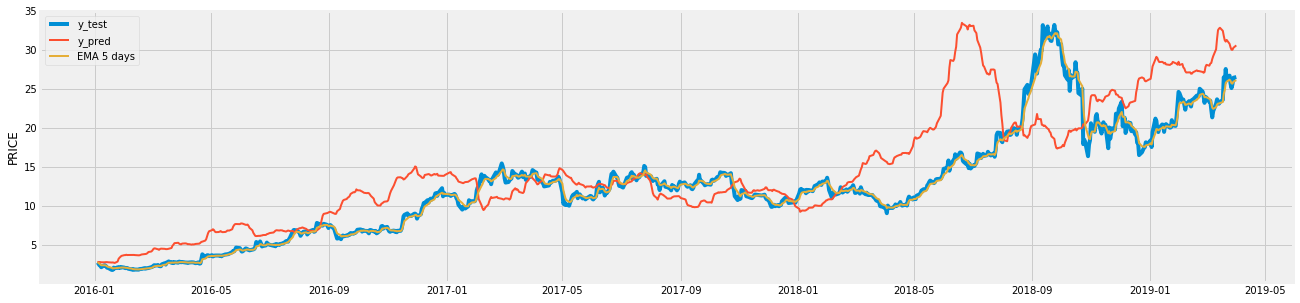

In [73]:
predictions_ema = ema_bstr()

#### SVM

In [102]:
X_train = amd[['Open','Open_Close','High_Low','log_Vol']][:700].values
y_train = amd[['Open_tmr']][:700].values
X_test = amd[['Open','Open_Close','High_Low','log_Vol']][700:].values
y_test = amd[['Open_tmr']][700:].values

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


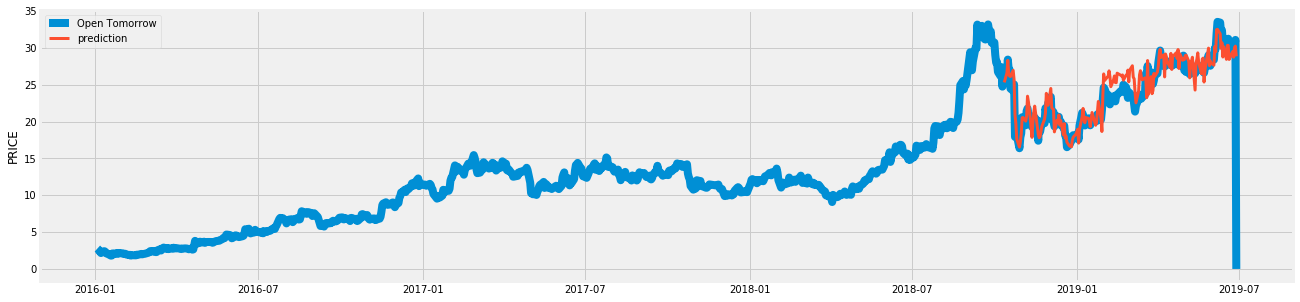

In [104]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_svm = svr_rbf.predict(X_test)
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][:],amd['Open_tmr'][:], linewidth=8, label = 'Open Tomorrow')
plt.plot(amd['Date'][700:], y_pred_svm, linewidth=3, label = 'prediction')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [105]:
svr_rbf

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
root_mean_sq_error = sqrt(mean_squared_error(y_test, y_pred_svm))
print('Root Mean Squared Error : ', root_mean_sq_error)

Root Mean Squared Error :  2.617532175293234


In [107]:
svr_rbf

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### ARIMA Model
- ARIMA stands for Auto-Regressive Integrated Moving Averages
- The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation

##### The predictors depend on the parameters (p,d,q) of the ARIMA model
- Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5)


- Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value


- Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results

##### Determining the value of p, q
- Autocorrelation Function (ACF)
- Partial Autocorrelation Function (PACF)

In [145]:
from statsmodels.tsa.arima_model import ARIMA

#size = int(len(amd.Open_tmr) * 0.79)
train, test = amd.Open_tmr[0:700], amd.Open_tmr[700:]

history = [x for x in train]
predictions_ARIMA = list()
for t in range(700,701 + len(test) - 1):
    model = ARIMA(history, order=(7,1,1)) ## as shown above
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions_ARIMA.append(yhat)
    obs = test[t]
    history.append(test[t])
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  876
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -875.420
Method:                       css-mle   S.D. of innovations              0.657
Date:                Wed, 04 Dec 2019   AIC                           1770.840
Time:                        18:51:54   BIC                           1818.594
Sample:                             1   HQIC                          1789.106
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0324      0.019      1.682      0.093      -0.005       0.070
ar.L1.D.y     -0.8195      0.093     -8.809      0.000      -1.002      -0.637
ar.L2.D.y     -0.0174      0.046     -0.383      0.702      -0.107       0.072
ar.L3.D.y      0.0911      0.044      2.060      0.040       0.004       0.178
ar.L4.D.y     -0.0223      0.044     -0.509      0.611      -0.108       0.063
ar.L5.D.y     -0.0229      0.044     -0.521      0.603      -0.109       0.063
ar.L6.D.y     -0.0260      0.044     -0.595      0.552      -0.112       0.060
ar.L7.D.y     -0.1202      0.035     -3.391      0.001      -0.190      -0.051
ma.L1.D.y      0.6810      0.089      7.646      0.000       0.506       0.856
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1265           -0.0000j            1.1265           -0.5000
AR.2           -0.9439           -0.7999j            1.2373           -0.3881
AR.3           -0.9439           +0.7999j            1.2373            0.3881
AR.4            1.2879           -0.6951j            1.4635           -0.0788
AR.5            1.2879           +0.6951j            1.4635            0.0788
AR.6            0.1113           -1.4968j            1.5009           -0.2382
AR.7            0.1113           +1.4968j            1.5009            0.2382
MA.1           -1.4685           +0.0000j            1.4685            0.5000
-----------------------------------------------------------------------------
"""

In [146]:
print(len(predictions_ARIMA))

178


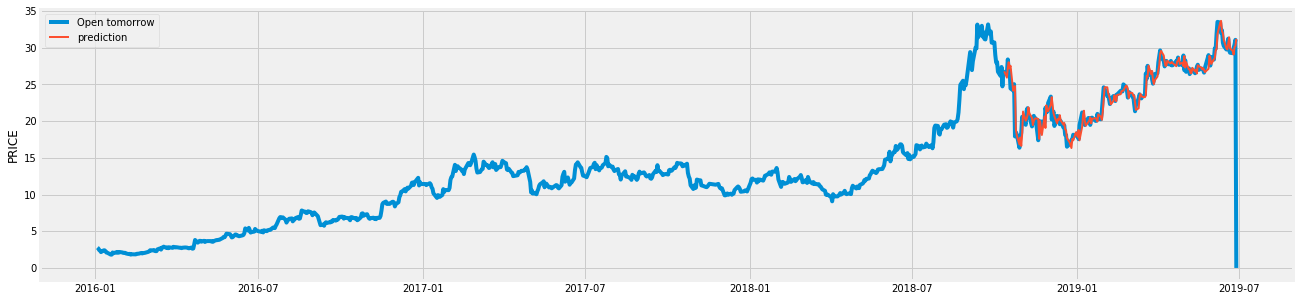

In [149]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][:].values, amd['Open_tmr'][:].values, linewidth=4, label = 'Open tomorrow')
plt.plot(amd['Date'][700:].values,predictions_ARIMA, linewidth=2, label = 'prediction')
plt.ylabel('PRICE')
plt.legend()
plt.show()

In [150]:
root_mean_sq_error = sqrt(mean_squared_error(amd['Open_tmr'][700:].values, predictions_ARIMA))
print('Root Mean Squared Error : ', root_mean_sq_error)

Root Mean Squared Error :  2.5958901393284117


## Kalman Filter

In [84]:
param0=[2.3, 1.7,1.8,1.9]

def kf_train(Y):
    Y = transpose(array(Y))
    T = Y.shape[0]
    
    # initial values
    x_init = np.array([[100], [0.01]]) # two states: stock price, percentage change in stock price
    P_init = 900 * np.eye(len(x_init))  

    # 2x2 identity matrix
    Idn = np.eye(2)

    # allocate result matrices
    x_predict = np.zeros((T, 2, 1))      # prediction of state vector
    P_predict = np.zeros((T, 2, 2))  # prediction error covariance matrix
    x_update = np.zeros((T, 2, 1))       # estimation of state vector
    P_update = np.zeros((T, 2, 2))   # estimation error covariance matrix


    K = np.zeros((T, 2, 1))       # Kalman Gain
    v = np.zeros((T, 1, 1))  # error of estimate
    F = np.zeros((T, 1, 1))

    # initial x
    x_update[0] = x_init
    P_update[0] = P_init
    x_predict[0] = x_init
    P_predict[0] = P_init
    
    q= param0[0]
    r= param0[1]

    # matrices
    t = 1
    A = array([[1, t], [0, 1]])
    Q = q*array([[1, 0], [0, 1]])
    H = array([1, 0])
    H.shape = (1, 2)
    R = r*1

    for i in range(T):
        # prediction stage
        if i > 0:
            x_predict[i] = A @ x_update[i-1]
            P_predict[i] = A @ P_update[i-1] @ transpose(A) + Q

        # estimation stage
        v[i] = Y[i] - H @ A @ x_update[i-1]
        F[i] = H @ P_predict[i] @ transpose(H) + R

        K[i] = P_predict[i] @ transpose(H) @ inv((H @ P_predict[i] @ transpose(H)) + R)
        
        x_update[i] = x_predict[i] + K[i] @ v[i] 
        P_update[i] = (Idn - K[i] @ H) @ P_predict[i]
                
    "smoother"
    L = np.zeros((T,2,2))

    x_smooth = np.zeros((T, 2, 1))      
    P_smooth = np.zeros((T, 2, 2)) 

    x_smooth[T-1] = x_update[T-1]
    P_smooth[T-1] = P_update[T-1]  
    
    
    for t in range(T-1,0,-1): #range(start, stop, step)
        L[t-1] = P_update[t-1] @ transpose(A) @ inv(P_predict[t-1]) 
        x_smooth[t-1] = x_update[t-1] + L[t-1] @ (x_smooth[t]-A @ x_update[t])
        P_smooth[t-1] = P_update[t-1] + L[t-1] @ (P_smooth[t]-P_update[t]) @ transpose(L[t-1])
     

    x_update.shape=(Y.shape[0],2,)
    x_smooth.shape=(Y.shape[0],2,)
    
    #one step forward prediction
    y_pred = A @ x_smooth[T-1]
    
    return x_smooth[:, 0], y_pred[0]

In [85]:
def kf_bstr():
    yhat_kf = np.zeros(total_days-(start_date+1))
    for t in range(start_date+1, total_days):    
        Y_train = amd['Open_tmr'][t-Window_size:t-1].values
        yhat_fit = kf_train(Y_train)[0]
        res_fit = Y_train - yhat_fit
        
        # bootstrap method: switching residuals
        y_pred_all = np.zeros(bootstrap_count)
        for i in range(0, bootstrap_count):
            err = np.random.choice(res_fit, (Window_size-1,), replace=True)
            y_bstr = yhat_fit + err                
            y_pred_bstr = kf_train(y_bstr)[1]
            y_pred_all[i]=y_pred_bstr            
        if t%100 ==0:
            print("kalman t:", t)    
        y_pred = y_pred_all.mean()
        yhat_kf[t-(start_date+1)]=y_pred
    
    #rmse_kf=np.sqrt(np.mean((Y-yhat_kf)**2))
    return yhat_kf# , rmse_kf

In [86]:
prediction_kf= kf_bstr()

kalman t: 100
kalman t: 200
kalman t: 300
kalman t: 400
kalman t: 500
kalman t: 600
kalman t: 700
kalman t: 800


In [87]:
y_test = amd.Open_tmr[0:816]

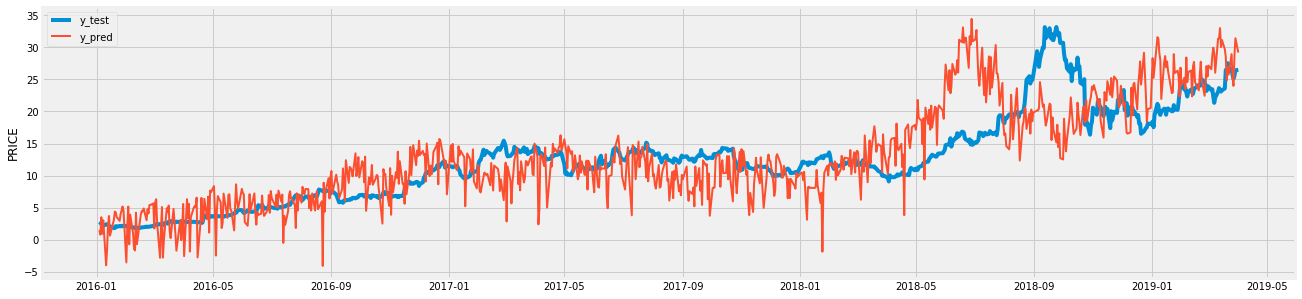

In [88]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][0:816], y_test,linewidth=4, label = 'y_test')
plt.plot(amd['Date'][0:816],prediction_kf, linewidth=2, label = 'y_pred')
plt.ylabel('PRICE')
plt.legend()
plt.show()

## Random Forest

In [159]:
df_bagging = pd.DataFrame()
df_bagging['Date'] = amd['Date'][-178:].tolist()
df_bagging['open_tomorrow'] = amd['Open_tmr'].tail(178).values
df_bagging['Linear_reg'] = y_pred_linear[-178:]
df_bagging['ARIMA'] = predictions_ARIMA
df_bagging['SVM'] = y_pred_svm[-178:].tolist()
df_bagging['EMA'] = predictions_ema[-178:]
df_bagging['KF'] = prediction_kf[-178:]

In [160]:
df_bagging.head()

,Date,open_tomorrow,Linear_reg,ARIMA,SVM,EMA,KF
0,2018-10-12,26.379999,26.337946,[26.789124907415488],25.311861,26.954410,22.679574
1,2018-10-15,26.629999,26.272016,[25.934901899137806],26.578688,26.826869,28.486289
2,2018-10-16,28.410000,28.487644,[27.238583758945257],28.304104,26.878180,23.718568
3,2018-10-17,27.080000,27.226765,[28.035869018342886],26.517592,27.467812,24.893521
4,2018-10-18,27.030001,26.612935,[27.17656952926653],26.172881,27.481850,30.373880


In [161]:
df_bagging.dtypes

Date             datetime64[ns]
open_tomorrow           float64
Linear_reg              float64
ARIMA                    object
SVM                     float64
EMA                     float64
KF                      float64
dtype: object

In [162]:
new = []
for i in df_bagging.ARIMA.tolist():
    i = str(i)
    new.append(i[1:8])
df_bagging['ARIMA'] = new
df_bagging['ARIMA'] = df_bagging['ARIMA'].astype(float)

In [163]:
df_bagging.dtypes

Date             datetime64[ns]
open_tomorrow           float64
Linear_reg              float64
ARIMA                   float64
SVM                     float64
EMA                     float64
KF                      float64
dtype: object

In [164]:
a = df_bagging['ARIMA']
b = df_bagging['SVM']
c = df_bagging['Linear_reg']
d = df_bagging['EMA']
e = df_bagging['KF']
f = df_bagging['open_tomorrow']
g = []

minimum_diff = pd.DataFrame([a, b,c,d,e]).min()

Y_bagging = np.zeros(df_bagging.shape[0])

for t in range(0, len(df_bagging)):
    if min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(a[t]-f[t]):
        Y_bagging[t] = a[t]
        g.append('ARIMA')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]), abs(e[t]-f[t]))== abs(b[t]-f[t]):
        Y_bagging[t] = b[t]
        g.append('SVM')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(c[t]-f[t]):
        Y_bagging[t] = c[t] 
        g.append('LR')
    elif min(abs(a[t]-f[t]),abs(b[t]-f[t]),abs(c[t]-f[t]),abs(d[t]-f[t]),abs(e[t]-f[t])) == abs(d[t]-f[t]):
        Y_bagging[t] = d[t]   
        g.append('EMA')
    else:
        Y_bagging[t] = e[t] 
        g.append('Kalman Filter')

df_bagging['model'] = g

In [165]:
df_bagging.tail()

,Date,open_tomorrow,Linear_reg,ARIMA,SVM,EMA,KF,model
173,2019-06-24,29.26,29.245350,29.5505,29.501900,30.323228,25.289340,LR
174,2019-06-25,29.98,28.816088,29.0663,28.737681,30.010323,23.998557,EMA
175,2019-06-26,30.41,29.902821,30.0893,30.048501,30.001311,28.750747,ARIMA
176,2019-06-27,31.08,30.773297,30.2227,30.234304,30.261024,31.427121,LR
177,2019-06-28,0.00,30.269092,31.2076,28.850991,30.566383,29.190589,SVM


In [166]:
df_bagging['model'].value_counts()

LR               75
EMA              38
ARIMA            34
SVM              17
Kalman Filter    14
Name: model, dtype: int64

In [167]:
df_bagging['Average_value'] = (df_bagging['ARIMA'] + df_bagging['Linear_reg'])/2

In [168]:
df_bagging.tail()

,Date,open_tomorrow,Linear_reg,ARIMA,SVM,EMA,KF,model,Average_value
173,2019-06-24,29.26,29.245350,29.5505,29.501900,30.323228,25.289340,LR,29.397925
174,2019-06-25,29.98,28.816088,29.0663,28.737681,30.010323,23.998557,EMA,28.941194
175,2019-06-26,30.41,29.902821,30.0893,30.048501,30.001311,28.750747,ARIMA,29.996061
176,2019-06-27,31.08,30.773297,30.2227,30.234304,30.261024,31.427121,LR,30.497999
177,2019-06-28,0.00,30.269092,31.2076,28.850991,30.566383,29.190589,SVM,30.738346


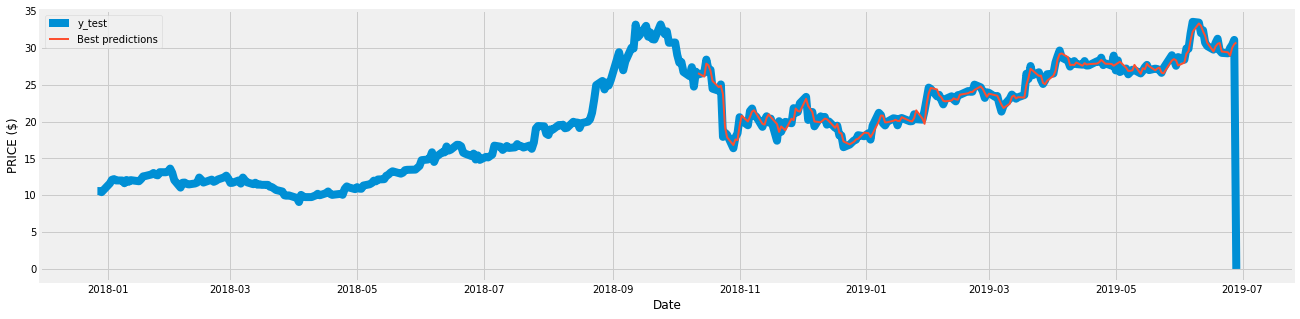

In [188]:
plt.figure(figsize=(20,5))
plt.plot(amd['Date'][500:].values, amd['Open_tmr'][500:].values, linewidth=8, label = 'y_test')
# plt.plot(df_bagging['Date'].values, df_bagging['Linear_reg'].values, linewidth=2, label = 'linear Reg')
# plt.plot(df_bagging['Date'].values, df_bagging['ARIMA'].values, linewidth=2, label = 'ARIMA')
# plt.plot(df_bagging['Date'].values, df_bagging['SVM'].values, linewidth=2, label = 'SVM')
# plt.plot(df_bagging['Date'].values, df_bagging['EMA'].values, linewidth=2, label = 'EMA')
plt.plot(df_bagging['Date'].values, df_bagging['Average_value'].values, linewidth=2, label = 'Best predictions')
plt.xlabel('Date')
plt.ylabel('PRICE ($)')
plt.legend()
plt.show()

## TRADING STRATERGY

In [170]:
df_position = pd.DataFrame()
df_position['open_tomorrow'] = df_bagging['open_tomorrow'].tolist()
df_position['Average_value'] = df_bagging['Average_value'].tolist()

In [171]:
df_position['signal_1'] = np.where(df_bagging['Average_value'] > df_bagging['open_tomorrow'], 1.0, 0.0)
df_position['position_1'] = df_position['signal_1']

In [172]:
signal_2 = np.zeros(len(df_bagging))
position_2= np.zeros(len(df_bagging))

df_position['signal_2'] = np.where(df_bagging['Average_value'] > df_bagging['open_tomorrow'], 1.0, 0.0)

for i in range(0, len(df_bagging)):
    if i == 0:
        position_2[i] = df_position['signal_2'][i]   
    elif df_position['signal_2'][i] != df_position['signal_2'][i-1]:
        position_2[i] = df_position['signal_2'][i]

In [173]:
df_position['position_2'] = position_2.tolist()
df_position['inc'] = df_position['signal_2'].diff()
df_position['Date'] = df_bagging.Date.tolist()
df_position.set_index('Date', inplace = True)

In [174]:
df_position[15:20]

,open_tomorrow,Average_value,signal_1,position_1,signal_2,position_2,inc
Date,,,,,,,
2018-11-02,20.120001,20.796321,1.0,1.0,1.0,1.0,1.0
2018-11-05,19.500000,20.005935,1.0,1.0,1.0,0.0,0.0
2018-11-06,21.420000,20.635202,0.0,0.0,0.0,0.0,-1.0
2018-11-07,21.770000,21.365130,0.0,0.0,0.0,0.0,0.0
2018-11-08,20.770000,21.531165,1.0,1.0,1.0,1.0,1.0


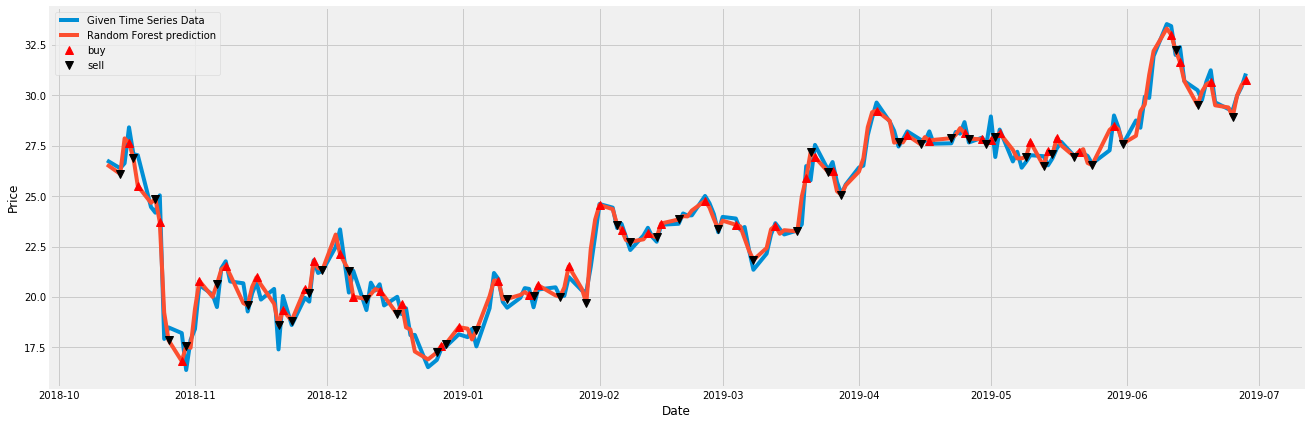

In [175]:
plt.figure(figsize=(20, 7))
plt.plot(df_position.index, amd['Open'][-178:],label='Given Time Series Data')
plt.plot(df_bagging.Date.values, df_position['Average_value'],label='Random Forest prediction')
plt.plot(df_position.loc[df_position.inc == 1.0].index, df_position.Average_value[df_position.inc == 1.0],'^', markersize=8, color='red', label='buy')        
plt.plot(df_position.loc[df_position.inc == -1.0].index, df_position.Average_value[df_position.inc== -1.0],'v', markersize=8, color='black', label='sell')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [185]:
init_bal = 1000000 # initial account balance
num_shares = 500 # number of shares being traded in one position
T = len(df_bagging)
Y =df_position['open_tomorrow']
Y_close = amd['Close'][-88:].tolist()

balance_rule1= np.zeros(T)
balance_rule2= np.zeros(T)
balance_rule3= np.zeros(T)

temp_bal1 = init_bal
temp_bal2 = init_bal
temp_bal3 = init_bal
for t in range(0,T):  
    # day trade
    print('temp_bal1 : ', temp_bal1)
    print('num_shares : ', num_shares)
    print('df_position["position_1"][t] : ', df_position['position_1'][t])
    print('Y_close[t] : ', Y_close[t])
    
    print("temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]")
    
    print(temp_bal1, "-", df_position['position_1'][t], '*' ,num_shares, '*', Y[t],'+', df_position['position_1'][t], '*', num_shares, '*', Y_close[t])
    
    print(temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t])
    
    print('=========================')
    
    balance_rule1[t] = temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
    temp_bal1 = balance_rule1[t]
    
    # long short
    balance_rule2[t] = temp_bal2 - df_position['position_2'][t]*num_shares*Y[t] + df_position['position_2'][t]*num_shares*Y_close[t]
    temp_bal2 = balance_rule2[t]  
    

temp_bal1 :  1000000
num_shares :  500
df_position["position_1"][t] :  1.0
Y_close[t] :  24.709999
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
1000000 - 1.0 * 500 * 26.379999 + 1.0 * 500 * 24.709999
999165.0
temp_bal1 :  999165.0
num_shares :  500
df_position["position_1"][t] :  0.0
Y_close[t] :  24.209999
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
999165.0 - 0.0 * 500 * 26.629999 + 0.0 * 500 * 24.209999
999165.0
temp_bal1 :  999165.0
num_shares :  500
df_position["position_1"][t] :  0.0
Y_close[t] :  23.48
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
999165.0 - 0.0 * 500 * 28.41 + 0.0 * 500 * 23.48
999165.0
temp_bal1 :  999165.0
num_shares :  500
df_position["position_1"][t] :  1.0
Y_close[t] :  23.530001
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t

1133239.9994999995 - 0.0 * 500 * 24.610001 + 0.0 * 500 * 32.41
1133239.9994999995
temp_bal1 :  1133239.9994999995
num_shares :  500
df_position["position_1"][t] :  1.0
Y_close[t] :  32.18
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
1133239.9994999995 - 1.0 * 500 * 24.43 + 1.0 * 500 * 32.18
1137114.9994999995
temp_bal1 :  1137114.9994999995
num_shares :  500
df_position["position_1"][t] :  1.0
Y_close[t] :  31.389999
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
1137114.9994999995 - 1.0 * 500 * 23.42 + 1.0 * 500 * 31.389999
1141099.9989999994
temp_bal1 :  1141099.9989999994
num_shares :  500
df_position["position_1"][t] :  0.0
Y_close[t] :  30.360001
temp_bal1 - df_position['position_1'][t]*num_shares*Y[t] + df_position['position_1'][t]*num_shares*Y_close[t]
1141099.9989999994 - 0.0 * 500 * 23.629999 + 0.0 * 500 * 30.360001
1141099.9989999994
temp_bal1 :  114

IndexError: list index out of range

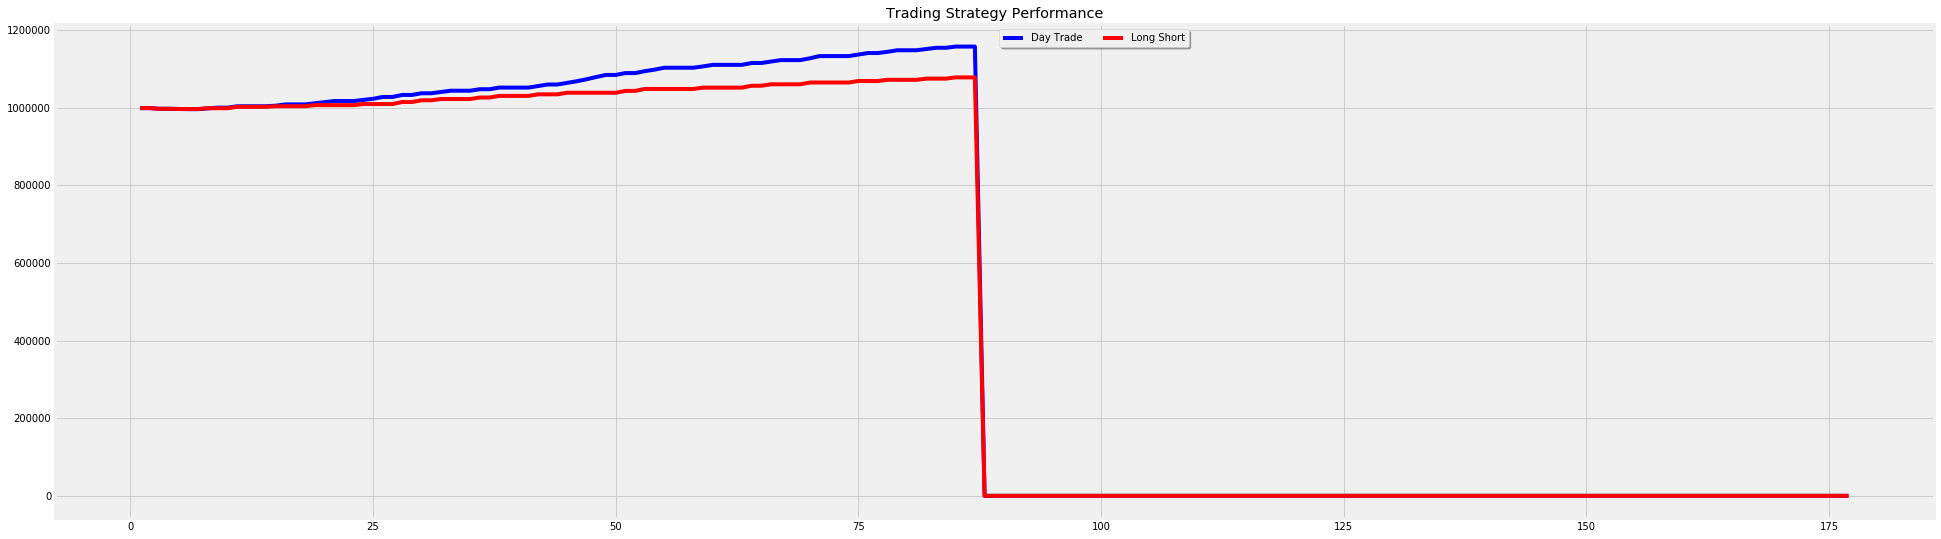

In [186]:
timevec = np.linspace(1,T-1,T-1)
plt.figure(figsize=(30,20))

ax1 = plt.subplot(211)
ax1.plot(timevec, balance_rule1[1:], 'blue', label = "Day Trade")
ax1.plot(timevec, balance_rule2[1:], 'red', label = "Long Short")
ax1.legend(loc=2, bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.title('Trading Strategy Performance')
plt.show()

In [187]:

balance_rule1 = np.insert(balance_rule1, 0, init_bal)
profit_loss1 =  np.diff(balance_rule1)

balance_rule2 = np.insert(balance_rule2, 0, init_bal)
profit_loss2 =  np.diff(balance_rule2)

total_profit1 = sum(x for x in profit_loss1 if x>0)    
total_loss1 = abs(sum(x for x in profit_loss1 if x<0))
cnt_profit1 = sum(1 for x in profit_loss1 if x>0)
cnt_loss1 = sum(1 for x in profit_loss1 if x<0)
        

total_profit2 = sum(x for x in profit_loss2 if x>0)    
total_loss2 = abs(sum(x for x in profit_loss2 if x<0))
cnt_profit2 = sum(1 for x in profit_loss2 if x>0)
cnt_loss2 = sum(1 for x in profit_loss2 if x>0)




# daily return in percentage
return1 = (balance_rule1 - init_bal)/init_bal*100
return2 = (balance_rule2 - init_bal)/init_bal*100


# ratios, assuming 3 month T bill rate around 2%
sharpe1 = (np.mean(return1) - 2)/np.std(return1-2)
sharpe2 = (np.mean(return2) - 2)/np.std(return2-2)
sharpe3 = (np.mean(return3) - 2)/np.std(return3-2)
sortino1 =(np.mean(return1) - 2)/np.std([x for x in return1 if x<0])
sortino2 =(np.mean(return2) - 2)/np.std([x for x in return2 if x<0])
sortino3 =(np.mean(return3) - 2)/np.std([x for x in return3 if x<0])



print("---------------------------1.DAY TRADE---------------------------")
print("number of trading days: ",T)      
print("total profit: ", total_profit1, "\t total loss: ", total_loss1, "\t profit%: ", total_profit1/init_bal)
print("net profit: ", total_profit1-total_loss1, "\t profit factor: ", total_profit1/total_loss1)
print("profit days: ", cnt_profit1, "\t loss days: ", cnt_loss1, "\t winning rate:", cnt_profit1/T)
print("aver net profit per trade: ", (total_profit1-total_loss1)/T)
print("aver daily return: ", np.mean(return1))
print("daily return std: ", np.std(return1))
print("daily return skewness: ", ss.skew(return1))
print("daily return kurtosis: ", ss.kurtosis(return1))
print("sharpe ratio: ", sharpe1, "\t sortino ratio: ",  sortino1)

den = ss.gaussian_kde(return1) 
xs = np.linspace(-3,3,400)
plt.plot(xs,den(xs))
plt.show()



print("---------------------------2.LONG SHORT---------------------------")
print("number of trading days: ",T)      
print("total profit: ", total_profit2, "\t total loss:", total_loss2, "\t profit%: ", total_profit2/init_bal)
print("net profit", total_profit2-total_loss2, "\t profit factor", total_profit2/total_loss2)
print("profit days: ", cnt_profit2, "\t loss days: ", cnt_loss2, "\t winning rate:", cnt_profit2/T)
print("aver net profit per trade: ", (total_profit2-total_loss2)/T)
print("aver daily return: ", np.mean(return2))
print("daily return std: ", np.std(return2))
print("daily return skewness: ", ss.skew(return2))
print("daily return kurtosis: ", ss.kurtosis(return2))
print("sharpe ratio: ", sharpe2, "\t sortino ratio: ",  sortino2)

den = ss.gaussian_kde(return2) 
xs = np.linspace(-3,3,400)
plt.plot(xs,den(xs))
plt.show()



print("---------------------------3.BUY HOLD---------------------------")
print("number of trading days: ",T)      
print("total profit: ", total_profit3, "\t total loss:", total_loss3, "\t profit%: ", total_profit3/init_bal)
print("net profit", total_profit3-total_loss3, "\t profit factor", total_profit3/total_loss3)
print("profit days: ", cnt_profit3, "\t loss days: ", cnt_loss3, "\t winning rate:", cnt_profit3/T)
print("aver net profit per trade: ", (total_profit3-total_loss3)/T)
print("aver daily return: ", np.mean(return3))
print("daily return std: ", np.std(return3))
print("daily return skewness: ", ss.skew(return3))
print("daily return kurtosis: ", ss.kurtosis(return3))
print("sharpe ratio: ", sharpe3, "\t sortino ratio: ",  sortino3, "--no negative return under buy hold except for initial long position")

den = ss.gaussian_kde(return3) 
xs = np.linspace(-1,6,400)
plt.plot(xs,den(xs))
plt.show()

NameError: name 'return3' is not defined